In [1]:
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchvision import datasets

from pathlib import Path
import pathlib
import os
import random
import numpy as np
import time
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
print("torch version: ", torch.__version__)

#from helpers import visualize
%matplotlib inline
from PIL import Image


cuda
torch version:  1.13.1


In [4]:
# Setup path to data folder
data_path = Path("ds/DARK/aug_49_mlo/")
# image_path = data_path / "splitted_ham10000"

rsnav1_aug = data_path 
train_dir = rsnav1_aug / "train"
df_path_train = train_dir/ "0"
# test_dir = image_path / "test"

# file_labels = []
# for name in os.listdir(train_dir):
#     file_labels.append(name)

# print("Train directory: ",train_dir)
# print("Test directory: ",test_dir)
# print("Labels: ",file_labels)

print(rsnav1_aug)
print(train_dir)
print(df_path_train)
print("len train, 1:", len(os.listdir(train_dir/"1")))
print("len train, 0:", len(os.listdir(train_dir/"0")))

ds\DARK\aug_49_mlo
ds\DARK\aug_49_mlo\train
ds\DARK\aug_49_mlo\train\0
len train, 1: 235
len train, 0: 235


# gaussian noise

In [11]:
from torchvision.transforms import Compose, PILToTensor, ToPILImage

In [12]:
transform_brightness = transforms.Compose( [ transforms.ColorJitter(brightness=0.6,
                                                                    contrast=1.2,
                                                                    saturation=0.7),
                                             transforms.ToTensor()] )

def gauss_noise_tensor(img):
    assert isinstance(img, torch.Tensor)
    dtype = img.dtype
    if not img.is_floating_point():
        img = img.to(torch.float32)
    
    sigma = 1
    
    out = img + sigma * torch.randn_like(img)
    
    if out.dtype != dtype:
        out = out.to(dtype)
        
    return out


gaussian_noise_transform = Compose([
    PILToTensor(),
    gauss_noise_tensor,
    ToPILImage()
])

In [ ]:
img_path = df_path_train/"45_310190625.png"

img = Image.open(img_path)
# imgplot = plt.imshow(img, 'gray')
v_img = transform_brightness(img)
# imgplot = plt.imshow(transforms.ToPILImage()(v_img), 'gray')


f, axarr = plt.subplots(1, 2, 
                        sharey=True,
                        figsize=(12, 4))
counter_img = 0
for counter_img in range(2):

    if counter_img == 0:
        img = Image.open(img_path)  
        axarr[counter_img].imshow(img, 'gray')
    else:
        v_img = transform_brightness(img)
        axarr[counter_img].imshow(gaussian_noise_transform(img), 'gray')

In [14]:
!dir rsna_dset_1_0reduced_splitted\train

Sistem belirtilen dosyay� bulam�yor.


# transformation

In [7]:
transform_rotate10 = transforms.Compose( [transforms.RandomRotation(degrees=(10, 10)), transforms.ToTensor()] )
transform_rotate15 = transforms.Compose( [transforms.RandomRotation(degrees=(15, 15)), transforms.ToTensor()] )
transform_rotate30 = transforms.Compose( [transforms.RandomRotation(degrees=(30, 30)), transforms.ToTensor()] )
transform_rotate60 = transforms.Compose( [transforms.RandomRotation(degrees=(60, 60)), transforms.ToTensor()] )
transform_rotate90 = transforms.Compose( [transforms.RandomRotation(degrees=(90, 90)), transforms.ToTensor()] )
transform_rotate120 = transforms.Compose( [transforms.RandomRotation(degrees=(120, 120)), transforms.ToTensor()] )
transform_rotate150 = transforms.Compose( [transforms.RandomRotation(degrees=(150, 150)), transforms.ToTensor()] )
transform_rotate210 = transforms.Compose( [transforms.RandomRotation(degrees=(210, 210)), transforms.ToTensor()] )
transform_rotate240 = transforms.Compose( [transforms.RandomRotation(degrees=(240, 240)), transforms.ToTensor()] )
transform_rotate270 = transforms.Compose( [transforms.RandomRotation(degrees=(270, 270)), transforms.ToTensor()] )
transform_rotate300 = transforms.Compose( [transforms.RandomRotation(degrees=(300, 300)), transforms.ToTensor()] )
transform_rotate330 = transforms.Compose( [transforms.RandomRotation(degrees=(330, 330)), transforms.ToTensor()] )
transform_h_flip = transforms.Compose( [transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()] )
transform_v_flip = transforms.Compose( [transforms.RandomVerticalFlip(p=1), transforms.ToTensor()] )
transform_random_rsize = transforms.Compose( [transforms.RandomResizedCrop(size=(512, 512), 
                                                                            scale=(0.96, 1), 
                                                                            ratio=(0.96, 1)), 
                                                                            transforms.ToTensor()] )
# transform_brightness = transforms.Compose( [ transforms.ColorJitter(brightness=0.3,
#                                                                     contrast=0.4,
#                                                                     saturation=0.3),
#                                              transforms.ToTensor()] )


In [14]:
# transform_rotate45 = transforms.Compose( [transforms.RandomRotation(45), transforms.ToTensor()] )
# transform_rotate90 = transforms.Compose( [transforms.RandomRotation(90), transforms.ToTensor()] )
# transform_rotate180 = transforms.Compose( [transforms.RandomRotation(180), transforms.ToTensor()] )
# transform_rotate270 = transforms.Compose( [transforms.RandomRotation(270), transforms.ToTensor()] )
# transform_rotate340 = transforms.Compose( [transforms.RandomRotation(340), transforms.ToTensor()] )

transform_rotate10 = transforms.Compose( [transforms.RandomRotation(degrees=(10, 10)), transforms.ToTensor()] )
transform_rotate15 = transforms.Compose( [transforms.RandomRotation(degrees=(15, 15)), transforms.ToTensor()] )
transform_rotate30 = transforms.Compose( [transforms.RandomRotation(degrees=(30, 30)), transforms.ToTensor()] )
transform_rotate60 = transforms.Compose( [transforms.RandomRotation(degrees=(60, 60)), transforms.ToTensor()] )
transform_rotate90 = transforms.Compose( [transforms.RandomRotation(degrees=(90, 90)), transforms.ToTensor()] )
transform_rotate120 = transforms.Compose( [transforms.RandomRotation(degrees=(120, 120)), transforms.ToTensor()] )
transform_rotate150 = transforms.Compose( [transforms.RandomRotation(degrees=(150, 150)), transforms.ToTensor()] )
transform_rotate210 = transforms.Compose( [transforms.RandomRotation(degrees=(210, 210)), transforms.ToTensor()] )
transform_rotate240 = transforms.Compose( [transforms.RandomRotation(degrees=(240, 240)), transforms.ToTensor()] )
transform_rotate270 = transforms.Compose( [transforms.RandomRotation(degrees=(270, 270)), transforms.ToTensor()] )
transform_rotate300 = transforms.Compose( [transforms.RandomRotation(degrees=(300, 300)), transforms.ToTensor()] )
transform_rotate330 = transforms.Compose( [transforms.RandomRotation(degrees=(330, 330)), transforms.ToTensor()] )
transform_rotate345 = transforms.Compose( [transforms.RandomRotation(degrees=(345, 345)), transforms.ToTensor()] )
transform_rotate350 = transforms.Compose( [transforms.RandomRotation(degrees=(350, 350)), transforms.ToTensor()] )
transform_h_flip = transforms.Compose( [transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()] )
transform_v_flip = transforms.Compose( [transforms.RandomVerticalFlip(p=1), transforms.ToTensor()] )
transform_random_rsize = transforms.Compose( [transforms.RandomResizedCrop(size=(512, 512), 
                                                                            scale=(0.96, 1), 
                                                                            ratio=(0.96, 1)), 
                                                                            transforms.ToTensor()] )
# transform_brightness = transforms.Compose( [ transforms.ColorJitter(brightness=0.3,
#                                                                     contrast=0.4,
#                                                                     saturation=0.3),
#                                              transforms.ToTensor()] )




# Setup path to data folder
data_path = Path("ds/DARK/aug_49_mlo/")
rsnav1_aug = data_path 
train_dir = rsnav1_aug / "train"
df_path_train = train_dir/ "1"

print("Before Aug:", str(len(os.listdir(df_path_train))))

start_aug_time = time.time()
for file in os.listdir(df_path_train):
    
    if file.endswith(".jpg"):
        # print("----> IMG: ", file)
        img_name = os.path.basename(file).partition(".jpg")[0] # remove .jpg extension
    if file.endswith(".png"):
        # print("----> IMG: ", file)
        img_name = os.path.basename(file).partition(".png")[0] # remove .png extension
    
    if file.endswith(".png") or file.endswith(".jpg"):
            
        img_path = df_path_train/file
        img = Image.open(img_path)

        h_img = transform_h_flip(img)
        v_img = transform_v_flip(img)
        # rotate10_img = transform_rotate10(img)
        rotate15_img = transform_rotate15(img)
        rotate30_img = transform_rotate30(img)
        # rotate60_img = transform_rotate60(img)
        # rotate90_img = transform_rotate90(img)
        # rotate120_img = transform_rotate120(img)
        # rotate150_img = transform_rotate150(img)
        # rotate210_img = transform_rotate210(img)
        # rotate240_img = transform_rotate240(img)
        # rotate270_img = transform_rotate270(img)
        # rotate300_img = transform_rotate300(img)
        rotate330_img = transform_rotate330(img)
        rotate345_img = transform_rotate345(img)
        # rotate350_img = transform_rotate350(img)

        # rotate45_img = transform_rotate45(img)
        # rotate90_img = transform_rotate90(img)
        # rotate180_img = transform_rotate180(img)
        # rotate270_img = transform_rotate270(img)
        # rotate340_img = transform_rotate340(img)
        # rand_rsize_img = transform_random_rsize(img)
        # rand_rsize2_img = transform_random_rsize(img)
        # rand_rsize3_img = transform_random_rsize(img)

        desired_extension = ".png"
        save_to = "ds/DARK/aug_49_mlo/train/1/" # df_path_train

        # if ("rot" not in str(img_path)):
        # transforms.ToPILImage()(h_img).save(save_to+img_name+"_h_flip"+desired_extension)
        # transforms.ToPILImage()(v_img).save(save_to+img_name+"_v_flip"+desired_extension)
        # # transforms.ToPILImage()(rotate10_img).save(save_to+img_name+"_rot10_"+desired_extension)
        transforms.ToPILImage()(rotate15_img).save(save_to+img_name+"_rot15_"+desired_extension)
        transforms.ToPILImage()(rotate30_img).save(save_to+img_name+"_rot30_"+desired_extension)
        # # # transforms.ToPILImage()(rotate60_img).save(save_to+img_name+"_rot60_"+desired_extension)
        # # # transforms.ToPILImage()(rotate120_img).save(save_to+img_name+"_rot120_"+desired_extension)
        # # # transforms.ToPILImage()(rotate150_img).save(save_to+img_name+"_rot150_"+desired_extension)
        # # # transforms.ToPILImage()(rotate210_img).save(save_to+img_name+"_rot210_"+desired_extension)
        # # # transforms.ToPILImage()(rotate240_img).save(save_to+img_name+"_rot240_"+desired_extension)
        # # # transforms.ToPILImage()(rotate300_img).save(save_to+img_name+"_rot300_"+desired_extension)
        # transforms.ToPILImage()(rotate330_img).save(save_to+img_name+"_rot330_"+desired_extension)
        transforms.ToPILImage()(rotate345_img).save(save_to+img_name+"_rot345_"+desired_extension)
        transforms.ToPILImage()(rotate350_img).save(save_to+img_name+"_rot350_"+desired_extension)
        # transforms.ToPILImage()(rand_rsize_img).save(save_to+img_name+"_r_size_"+desired_extension)
        # # transforms.ToPILImage()(rand_rsize2_img).save(save_to+img_name+"_r_size_2_"+desired_extension)
        # # transforms.ToPILImage()(rand_rsize2_img).save(save_to+img_name+"_r_size_3_"+desired_extension)
        # transforms.ToPILImage()(rand_rsize3_img).save(save_to+img_name+"_r_size_4_"+desired_extension)
    
    # rotations to flipped images are also applicable

end_aug_time = time.time()

print("After Aug:", str(len(os.listdir(df_path_train))))
print(f"Total training time: {end_aug_time-start_aug_time:.2f} (s).")


Before Aug: 940
After Aug: 4700
Total training time: 39.88 (s).


In [ ]:
from util_dataload import create_dataloader, get_class_names_dloader
from torch.utils.data import DataLoader

# crop img

In [3]:
data_path = Path("ds/DARK/aug_49_mlo_CROP")
# image_path = data_path / "splitted_ham10000"

rsnav1_aug = data_path 
train_dir = rsnav1_aug / "train"
df_path_train = train_dir/ "1"


In [18]:
import cv2 
import glob
from pathlib import Path
from sklearn.model_selection import train_test_split
import shutil
import plistlib
from skimage.draw import *
from tqdm.auto import tqdm

def crop(img):

    blur = cv2.GaussianBlur(img,(5,5),0)
    _, breast_mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    cnts, _ = cv2.findContours(breast_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(cnts, key = cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)

    return img[y:y+h, x:x+w], breast_mask[y:y+h, x:x+w]

data_path = Path("ds/DARK/aug_49_mlo/")
# image_path = data_path / "splitted_ham10000"

rsnav1_aug = data_path 
train_dir = rsnav1_aug / "test"
df_path_train = train_dir/ "1"

start_crop_time = time.time()
for file in os.listdir(df_path_train):
    img_path = df_path_train/file
    img = Image.open(img_path)
    img = np.array(img)

    # rand_rsize3_img = transform_random_rsize(img)

    desired_extension = ".png"
    save_to = "ds/DARK/aug_49_mlo_CROP/"+"test/"+"1/" # df_path_train

    cv2.imwrite(save_to+file,crop(img)[0])    

end_crop_time = time.time()

print(f"Total training time: {end_crop_time-start_crop_time:.2f} (s).")

Total training time: 0.56 (s).


# plot

In [25]:
transform_rotate30 = transforms.Compose( [transforms.RandomRotation(degrees=(15, 15)), transforms.ToTensor()] )
transform_rotate30 = transforms.Compose( [transforms.RandomRotation(degrees=(30, 30)), transforms.ToTensor()] )
transform_rotate60 = transforms.Compose( [transforms.RandomRotation(degrees=(60, 60)), transforms.ToTensor()] )
transform_rotate90 = transforms.Compose( [transforms.RandomRotation(degrees=(90, 90)), transforms.ToTensor()] )
transform_rotate120 = transforms.Compose( [transforms.RandomRotation(degrees=(120, 120)), transforms.ToTensor()] )
transform_rotate150 = transforms.Compose( [transforms.RandomRotation(degrees=(150, 150)), transforms.ToTensor()] )
transform_rotate210 = transforms.Compose( [transforms.RandomRotation(degrees=(210, 210)), transforms.ToTensor()] )
transform_rotate240 = transforms.Compose( [transforms.RandomRotation(degrees=(240, 240)), transforms.ToTensor()] )
transform_rotate270 = transforms.Compose( [transforms.RandomRotation(degrees=(270, 270)), transforms.ToTensor()] )
transform_rotate300 = transforms.Compose( [transforms.RandomRotation(degrees=(300, 300)), transforms.ToTensor()] )
transform_rotate330 = transforms.Compose( [transforms.RandomRotation(degrees=(330, 330)), transforms.ToTensor()] )

# transform_rotate45 = transforms.Compose( [transforms.RandomRotation(45), transforms.ToTensor()] )
# transform_rotate90 = transforms.Compose( [transforms.RandomRotation(90), transforms.ToTensor()] )
# transform_rotate180 = transforms.Compose( [transforms.RandomRotation(180), transforms.ToTensor()] )
# transform_rotate270 = transforms.Compose( [transforms.RandomRotation(0), transforms.ToTensor()] )
# transform_h_flip = transforms.Compose( [transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()] )
# transform_v_flip = transforms.Compose( [transforms.RandomVerticalFlip(p=1), transforms.ToTensor()] )
# transform_random_rsize = transforms.Compose( [transforms.RandomResizedCrop(size=(512, 512), 
#                                                                             scale=(0.48, 0.92), 
#                                                                             ratio=(0.64, 1)), 
#                                                                             transforms.ToTensor()] )



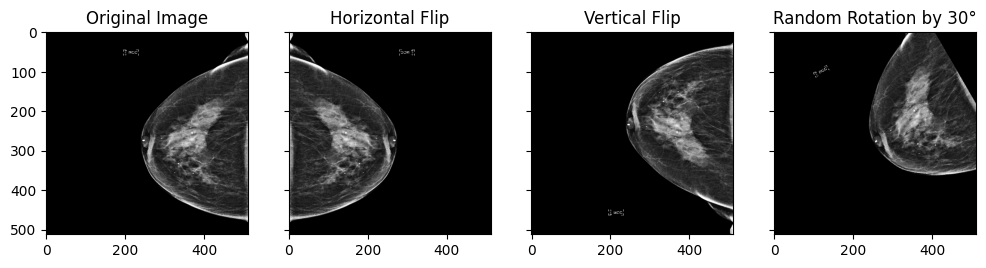

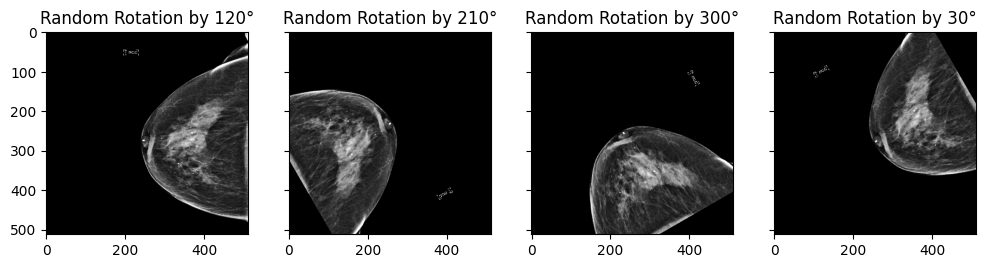

In [28]:
img_path = df_path_train/"729_730395278.png"

img = Image.open(img_path)
# imgplot = plt.imshow(img, 'gray')
v_img = transform_brightness(img)
# imgplot = plt.imshow(transforms.ToPILImage()(v_img), 'gray')


f, axarr = plt.subplots(1, 4, 
                        sharey=True,
                        figsize=(12, 4))

counter_img = 0
for counter_img in range(4):

    if counter_img == 0:
        img = Image.open(img_path)  
        axarr[counter_img].imshow(img, 'gray')
        axarr[counter_img].set_title("Original Image")

    if counter_img == 1:
        v_img = transform_h_flip(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Horizontal Flip")
    if counter_img == 2:
        v_img = transform_v_flip(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Vertical Flip")
    if counter_img == 3:
        v_img = transform_rotate30(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Rotation by 30°")

f, axarr = plt.subplots(1, 4, 
                        sharey=True,
                        figsize=(12, 4))

counter_img = 0
for counter_img in range(4):

    if counter_img == 0:
        img = Image.open(img_path)  
        v_img = transform_rotate120(img)
        axarr[counter_img].imshow(img, 'gray')
        axarr[counter_img].set_title("Random Rotation by 120°")

    if counter_img == 1:
        v_img = transform_rotate210(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Rotation by 210°")
    if counter_img == 2:
        v_img = transform_rotate300(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Rotation by 300°")
    if counter_img == 3:
        v_img = transform_rotate30(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Rotation by 30°")



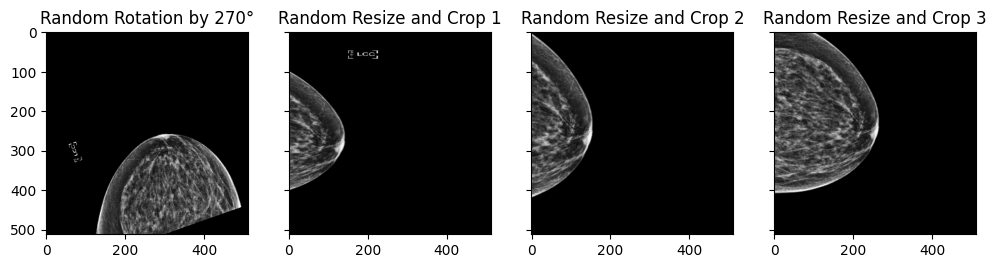

In [29]:
img_path = df_path_train/"236_1593856707.png"

img = Image.open(img_path)
# imgplot = plt.imshow(img, 'gray')
v_img = transform_brightness(img)
# imgplot = plt.imshow(transforms.ToPILImage()(v_img), 'gray')


f, axarr = plt.subplots(1, 4, 
                        sharey=True,
                        figsize=(12, 4))

counter_img = 0
for counter_img in range(4):

    if counter_img == 0:
        v_img = transform_rotate270(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Rotation by 270°")

    if counter_img == 1:
        v_img = transform_random_rsize(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Resize and Crop 1")
    if counter_img == 2:
        v_img = transform_random_rsize(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Resize and Crop 2")
    if counter_img == 3:
        v_img = transform_random_rsize(img)
        axarr[counter_img].imshow(transforms.ToPILImage()(v_img), 'gray')
        axarr[counter_img].set_title("Random Resize and Crop 3")

In [7]:
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # standard deviation of [0.229, 0.224, 0.225] (across each colour channel)
])

In [ ]:
for i in range(10):
  transform_random_rsize = transforms.Compose( [transforms.RandomResizedCrop(
                                              size=(224, 224), 
                                              scale=(0.32, 0.72), 
                                              ratio=(0.72, 1)), 
                                            transforms.ToTensor()] )

  img = Image.open(denemee_aug_path/"indir.jpg")
  rand_rsize_img = transform_random_rsize(img)
  transforms.ToPILImage()(rand_rsize_img).save("new_augmented/"+"indir"+"_r_size_"+str(i)+"_.png")